Epoch: 0050 cost= 73032589312.000000000 W= 2179.4265 b= 349.89328
Epoch: 0100 cost= 56735461376.000000000 W= 3992.276 b= 644.7726
Epoch: 0150 cost= 46013534208.000000000 W= 5499.748 b= 894.292
Epoch: 0200 cost= 39055749120.000000000 W= 6753.1826 b= 1106.0729
Epoch: 0250 cost= 34624565248.000000000 W= 7795.2886 b= 1286.4562
Epoch: 0300 cost= 31876788224.000000000 W= 8661.59 b= 1440.7114
Epoch: 0350 cost= 30239787008.000000000 W= 9381.637 b= 1573.227
Epoch: 0400 cost= 29326397440.000000000 W= 9980.018 b= 1687.6552
Epoch: 0450 cost= 28876273664.000000000 W= 10477.204 b= 1787.0304
Epoch: 0500 cost= 28715538432.000000000 W= 10890.199 b= 1873.8776
Epoch: 0550 cost= 28729128960.000000000 W= 11233.128 b= 1950.2998
Epoch: 0600 cost= 28841768960.000000000 W= 11517.805 b= 2018.048
Epoch: 0650 cost= 29004972032.000000000 W= 11754.002 b= 2078.571
Epoch: 0700 cost= 29188263936.000000000 W= 11949.9 b= 2133.0789
Epoch: 0750 cost= 29372981248.000000000 W= 12112.232 b= 2182.5813
Epoch: 0800 cost= 295483

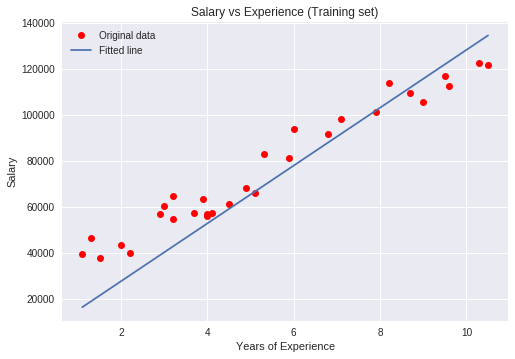

In [10]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas as pd

rng = numpy.random
learning_rate = 0.0001
num_of_epochs = 1000
disp_steps = 50

dataset_url = 'https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv'
dataset = pd.read_csv(dataset_url)

xTrain = dataset.iloc[:, :-1].values
yTrain = dataset.iloc[:, 1].values
num_of_samples = 30

X = tf.placeholder("float", name = 'x')
Y = tf.placeholder("float", name = 'y')

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# prediction = w*x + b
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*num_of_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(num_of_epochs):
        for (x, y) in zip(xTrain, yTrain):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % disp_steps == 0:
            c = sess.run(cost, feed_dict={X: xTrain, Y:yTrain})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: xTrain, Y: yTrain})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(xTrain, yTrain, 'ro', label='Original data')
    plt.plot(xTrain, sess.run(W) * xTrain + sess.run(b), label='Fitted line')
    plt.legend()
    plt.title('Salary vs Experience (Training set)')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()
